In [57]:
# !pip install pystan==2.19.1.1
# !pip install prophet --upgrade

import pandas as pd
from prophet import Prophet
import datetime

In [58]:
df = pd.read_csv('../data/since-2020.csv')
# df['ds'] = pd.to_datetime(df['Date'] + ' ' + (df['Time'] - 1).astype(str) + ':00')
df['ds'] = pd.to_datetime(df['Date'] + ' ' + (df['Time'] - 1).astype(str) + ':00') + datetime.timedelta(hours = 1)
df = df.sort_values(by='ds', ascending=False)
df.head()

,Date,Time,Stretcher Pts hrly,Stretcher Pts cum,Ambulatory Pts hrly,Ambulatory Pts cum,Total Inflow hrly,Total Inflow cum,Ambulances hrly,Ambulances cum,...,Ambulatory Pts TBS in Vertical,QTrack Patients TBS,GARAGE patient TBS,Consults > 2h in Vertical Except IM,Consult for IM >4h in Vertical,Plain films reqs > 2 hr in Vertical,CTs reqs > 2 hrs in Vertical,Psych Stretcher Pts1pt,Psych pts waiting for admission,ds
16909,01/13/22,14,7,71,4,30,11,101,1,15,...,6,0.0,6.0,4,0,0,3,2,1,2022-01-13 14:00:00
16910,01/13/22,13,7,61,12,29,19,90,2,13,...,5,0.0,5.0,6,0,0,2,1,1,2022-01-13 13:00:00
16911,01/13/22,12,11,54,3,17,14,71,2,11,...,2,0.0,1.0,3,0,0,2,2,1,2022-01-13 12:00:00
16912,01/13/22,11,12,44,4,13,16,57,3,9,...,2,0.0,5.0,3,0,0,1,2,1,2022-01-13 11:00:00
16913,01/13/22,10,10,31,5,11,15,42,2,6,...,2,0.0,1.0,2,0,0,0,1,1,2022-01-13 10:00:00


In [96]:
output = pd.DataFrame()
for column in df.columns.to_list():
    if column in ['Date', 'Time', 'ds']:
        continue
    try:
        # column = 'Total Inflow hrly'
        print('working on '+column)
        df2 = df[['ds', column]]
        df2.columns = ['ds','y']
        df2 = df2.reset_index(drop=True)
        m = Prophet(interval_width=0.95)
        m.fit(df2)
        future = m.make_future_dataframe(periods=24*7, freq='H')
        forecast = m.predict(future.tail(24*14))
        output['ds'] = forecast['ds']
        forecast = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
        for forecast_column in forecast.columns.tolist():
            output[column+'_'+forecast_column] = forecast[forecast_column]
        

    except:
        print(column + ' failed')


working on Stretcher Pts hrly
working on Stretcher Pts cum
working on Ambulatory Pts hrly
working on Ambulatory Pts cum
working on Total Inflow hrly
working on Total Inflow cum
working on Ambulances hrly
working on Ambulances cum
working on FLS hrly
working on Adm. requests cum
working on Admissions cum
working on Pts.waiting for admission CUM
working on Total Stretcher pts
working on Triage hallway pts
working on Triage hallway pts TBS
working on Re-Oriented Nurse cum
working on Re-Oriented MD QTrack D/C
working on Re-Oriented MD QTrack NotD/C
working on Resus Pts
working on Totalpts in PODs except Psych
working on Green Pts
working on Green Pts TBS
working on Yellow PTS
working on Yellow Pts TBS
working on Orancge Pts except psych
working on Orange Pts TBS
working on Consults > 2h in PODS except IM
working on Consult for IM >4h in PODS
working on Plain films reqs > 2 h in PODs
working on CTs reqs > 2 h in PODs
working on Post POD (Family room)
working on Stretcher Pts in Vertical
wor

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


working on QTrack Patients TBS


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


working on GARAGE patient TBS
working on Consults > 2h in Vertical Except IM
working on Consult for IM >4h in Vertical
working on Plain films reqs > 2 hr in Vertical
working on CTs reqs > 2 hrs in Vertical
working on Psych Stretcher Pts1pt
working on Psych pts waiting for admission


In [98]:
output.to_csv('../data/forecast.csv', index=False)

In [95]:
column = 'Total Inflow hrly'
print(column)
df2 = df[['ds', column]]
df2.columns = ['ds','y']
df2 = df2.reset_index(drop=True)
m = Prophet(interval_width=0.95)
m.fit(df2)
future = m.make_future_dataframe(periods=24*7, freq='H')
forecast = m.predict(future.tail(24*14))
output['ds'] = forecast['ds']
forecast = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
for forecast_column in forecast.columns.tolist():
    output[column+'_'+forecast_column] = forecast[forecast_column]
output

Total Inflow hrly


,ds,Total Inflow hrly_yhat,Total Inflow hrly_yhat_lower,Total Inflow hrly_yhat_upper
0,2022-01-06 14:00:00,14.175858,8.054913,20.132531
1,2022-01-06 15:00:00,13.315347,6.992316,19.423472
2,2022-01-06 16:00:00,12.318746,6.203230,18.592910
3,2022-01-06 17:00:00,11.175609,4.858136,16.962803
4,2022-01-06 18:00:00,10.065342,3.770017,16.385835
...,...,...,...,...
331,2022-01-20 10:00:00,12.915978,6.609500,18.953733
332,2022-01-20 11:00:00,14.609823,8.471465,20.777732
333,2022-01-20 12:00:00,14.975983,8.691163,21.029254
334,2022-01-20 13:00:00,14.512467,8.407789,20.843759


In [92]:
output = pd.DataFrame()
pd.concat([output, forecast, forecast], axis=1).columns

Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'ds', 'yhat', 'yhat_lower',
       'yhat_upper'],
      dtype='object')

In [78]:
future.tail(24*14)

,ds
17664,2022-01-06 14:00:00
17665,2022-01-06 15:00:00
17666,2022-01-06 16:00:00
17667,2022-01-06 17:00:00
17668,2022-01-06 18:00:00
...,...
17995,2022-01-20 10:00:00
17996,2022-01-20 11:00:00
17997,2022-01-20 12:00:00
17998,2022-01-20 13:00:00


In [60]:
m = Prophet(interval_width=0.95)
m.fit(df2)

In [61]:
future = m.make_future_dataframe(periods=24, freq='H')
# future.tail(24)

In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
17832,2022-01-13 15:00:00,13.041819,7.352148,19.113796
17833,2022-01-13 16:00:00,12.045568,5.936161,18.579688
17834,2022-01-13 17:00:00,10.902786,4.548414,17.036377
17835,2022-01-13 18:00:00,9.792878,3.827521,15.653462
17836,2022-01-13 19:00:00,8.936907,3.012191,16.158975
17837,2022-01-13 20:00:00,8.332534,2.636266,14.755540
17838,2022-01-13 21:00:00,7.697525,1.797579,13.381346
17839,2022-01-13 22:00:00,6.723092,0.536882,13.275216
17840,2022-01-13 23:00:00,5.393376,-0.590401,11.599948
17841,2022-01-14 00:00:00,4.032872,-2.484850,10.169088


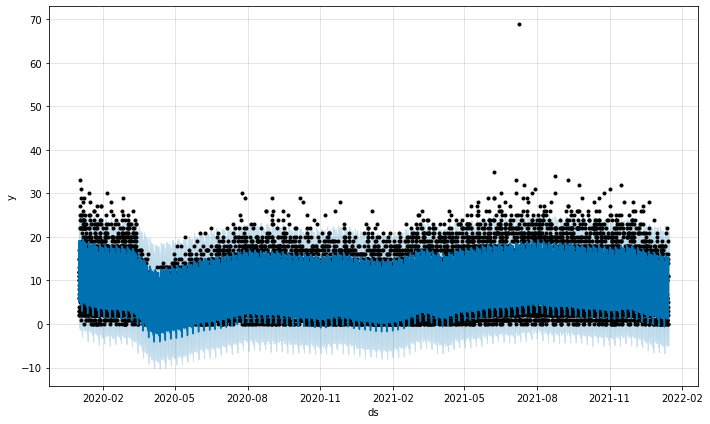

In [63]:
fig1 = m.plot(forecast)

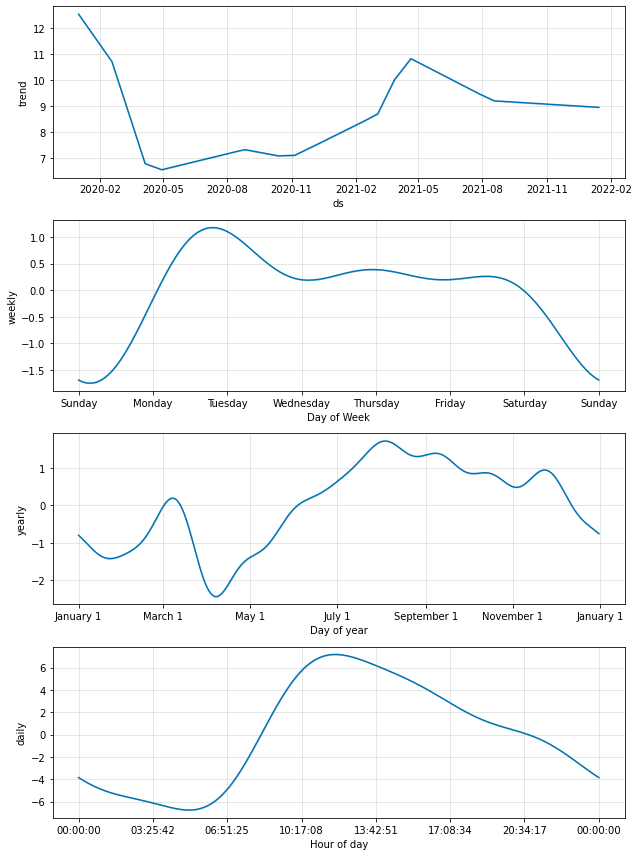

In [64]:
fig2 = m.plot_components(forecast)


In [67]:
df3 = pd.merge(left=df2, right=forecast)
df3 = df3[['ds', 'y', 'yhat', 'yhat_upper']]
df3

,ds,y,yhat,yhat_upper
0,2022-01-13 14:00:00,11,13.901985,20.002895
1,2022-01-13 13:00:00,19,14.670233,20.483468
2,2022-01-13 12:00:00,14,15.134703,21.616590
3,2022-01-13 11:00:00,16,14.769494,20.707071
4,2022-01-13 10:00:00,15,13.076599,18.996830
...,...,...,...,...
17829,2020-01-01 05:00:00,3,5.185776,11.234889
17830,2020-01-01 04:00:00,6,5.521474,11.388905
17831,2020-01-01 03:00:00,9,6.012752,12.306762
17832,2020-01-01 02:00:00,6,6.458565,12.657865


In [68]:
df3[df3.y>df3.yhat_upper].head(10)

,ds,y,yhat,yhat_upper
27,2022-01-12 10:00:00,22,13.076216,18.786608
70,2022-01-10 15:00:00,21,14.026405,20.113560
183,2022-01-05 22:00:00,16,7.227511,13.303964
187,2022-01-05 18:00:00,18,10.264655,16.551244
410,2021-12-27 11:00:00,24,16.041055,22.106619
524,2021-12-22 17:00:00,19,11.845561,18.030067
570,2021-12-20 19:00:00,19,10.784412,17.099502
577,2021-12-20 12:00:00,28,16.712535,22.982246
591,2021-12-19 22:00:00,15,7.028850,13.390040
643,2021-12-17 18:00:00,18,10.781164,16.823321


In [81]:
df3 = pd.DataFrame()
df3

""
